Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


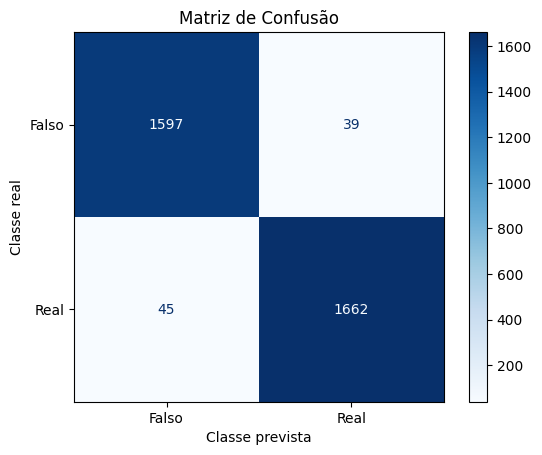

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Encontra diretorio atual
atual_dir = os.getcwd()

# Acessa arquivo pkl das noticias
parent_dir = os.path.split(atual_dir)

# Caminho onde o modelo foi salvo
model_save_path = os.path.join(parent_dir[0], "Treinamento\\bert_model.bin")

# Inicializa um modelo BERT para classificação
model = BertForSequenceClassification.from_pretrained('neuralmind/bert-base-portuguese-cased')

# Carrega os pesos do modelo salvo
model.load_state_dict(torch.load(model_save_path))

# Coloca o modelo em modo de avaliação
model.eval()


# Carrega o CSV salvo
test_save_path = os.path.join(parent_dir[0], "Treinamento\\test_with_predictions.csv")
test_df = pd.read_csv(test_save_path)

# Carrega arquivos pertinentes ao treinamento da rede neural e X_test e y_test (usados na avaliação de resultados)
y_test = test_df['Categoria']  
y_pred = test_df['predicted_label']


# Lê o arquivo .csv
parent_dir_2 = os.path.split(parent_dir[0])
parent_dir_2 = os.path.split(parent_dir_2[0])
caminho_csv = os.path.join(parent_dir_2[0], "Pre-processamento\\noticias_dados_limpos.csv")
df = pd.read_csv(caminho_csv)

# Cria um objeto LabelEncoder
le = LabelEncoder()

# Transforma os rótulos de categorias para variáveis categóricas
df['label'] = le.fit_transform(df['Categoria'])

# Obtém os nomes das classes
nomes_classes = le.classes_

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plota a matriz de confusão
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
plt.show()


In [4]:
# Converte os rótulos de texto para os valores numéricos usados no modelo
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calcula as métricas com os rótulos numéricos
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded)  
recall = recall_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)

# Exibe os resultados
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Acurácia: 0.9749
Precisão: 0.9771
Recall: 0.9736
F1-Score: 0.9754


In [5]:
# Carrega o tokenizador
tokenizer = BertTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

# Texto para fazer a previsão
texto = """
'Não acho que a gente tenha problema no Congresso', diz Lula sobre articulação política
Questionado, presidente minimizou reclamações de parlamentares e evitou detalhar reunião fora da agenda com Arthur Lira. Lula também negou que tenha intenção de trocar ministros.
O presidente Luiz Inácio Lula da Silva (PT) negou nesta terça-feira (23) que o governo tenha problemas de articulação política no Congresso Nacional – apontados, nos últimos meses, pelos próprios parlamentares.
Lula afirmou, ainda, que está em uma "situação de muita tranquilidade na relação com o Congresso Nacional", e previu placares vitoriosos para as próximas votações.

O cenário indicado até o momento, no entanto, é de possíveis revezes em vetos – como no projeto que restringe as "saidinhas" de presos – e de pressão pela aprovação de pautas-bomba como a PEC do Quinquênio, que pode gerar custos adicionais de até R$ 82 bilhões nos próximos três anos.

"""

texto = texto.lower()

# Realiza a tokenização do texto
inputs = tokenizer(texto, return_tensors="pt", truncation=True, max_length=128)

# Faz a previsão
with torch.no_grad():
    outputs = model(**inputs)

# Obtem as previsões
logits = outputs.logits
predicted_class_idx = logits.argmax().item()

# Mapeia o índice da classe prevista para a categoria
# Cria um objeto LabelEncoder
le = LabelEncoder()

# Transforma os labels para variáveis categóricas
df['label'] = le.fit_transform(df['Categoria'])

original_class = le.inverse_transform([predicted_class_idx]) 
print(f"Classe original: {original_class[0]}")



c:\Users\mathe\anaconda3\envs\detector\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Classe original: Real


In [6]:

# Texto para fazer a previsão
texto = """Tubarões voadores são descobertos no oceano Atlântico. Um grupo de cientistas marinhos relatou a descoberta de uma nova espécie de tubarões voadores nas águas profundas do oceano Atlântico. Esses tubarões têm a habilidade única de se elevar acima da superfície do mar e planar por longas distâncias. A descoberta desafia as noções convencionais sobre a biologia marinha e promete revolucionar nossa compreensão dos ecossistemas oceânicos.

"""

texto = texto.lower()

# Realiza a tokenização do texto
inputs = tokenizer(texto, return_tensors="pt", truncation=True, max_length=128)

# Faz a previsão
with torch.no_grad():
    outputs = model(**inputs)

# Obtem as previsões
logits = outputs.logits
probabilidades = torch.softmax(logits, dim=1)[0]

# Obtem o índice da classe com a maior probabilidade
predicted_class_idx = torch.argmax(probabilidades).item()

# Cria um objeto LabelEncoder
le = LabelEncoder()

# Transforma os labels para variáveis categóricas
df['label'] = le.fit_transform(df['Categoria'])

original_class = le.inverse_transform([predicted_class_idx]) 
print(f"Classe original: {original_class[0]}")



Classe original: Falso
